In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import sncosmo
#import jp as sncosmo
import astropy.units as u
import glob
import numpy as np

csp = sncosmo.get_magsystem('csp')

salt2 = sncosmo.SALT2Source(modeldir=None, m0file='salt2_template_0.dat', m1file='salt2_template_1.dat', clfile='salt2_color_correction.dat', cdfile='salt2_color_dispersion.dat', errscalefile='salt2_lc_dispersion_scaling.dat', lcrv00file='salt2_lc_relative_variance_0.dat', lcrv11file='salt2_lc_relative_variance_1.dat', lcrv01file='salt2_lc_relative_covariance_01.dat', name=None, version=None)
#ab = sncosmo.get_magsystem('ab')
chi_quad_ndof = []
names = glob.glob("*.txt")

#print(names)
for j in range(0, len(names)):
    #j = 4
    print(names[j])

    data = sncosmo.read_lc(names[j])
    
    #for i in range(0, len(data['flux'])):
        
    #data['fluxerr'][i] = 2*np.log(10)*(10**((data['zp'][i] - data['flux'][i])/2.5))*data['fluxerr'][i]/2.5 #flux error conversion
    #data['fluxerr'][i] = (2*np.log(10)/5)*10**(2*(data['zp'][i] - data['flux'][i])/5)*data['fluxerr'][i]
        
    #data['flux'][i] = csp.band_mag_to_flux(data['flux'][i], 'cspr')
    
    #print(data['flux'])
    model = sncosmo.Model(source=salt2)
    
    #model.bandmag('cspb', 'csp')
    model.set(z=data['redshift'][0])  # set the model's redshift
    
    result, fitted_model = sncosmo.fit_lc( data, model, ['t0', 'x0', 'x1', 'c'])
               
    index = []
    
    for i in range(0,len(data['time'])):
        
        if data['time'][i] - result.parameters[1] > 50:
            
            index.append(i)
                
        if data['time'][i] - result.parameters[1] < -20:
            
            index.append(i)
        
        
    teste = np.delete(data, index , axis=0)           
    print(data['redshift'][0])
    model2 = sncosmo.Model(source=salt2)
    model.set(z=data['redshift'][0])  # set the model's redshift
    
    result2, fitted_model2 = sncosmo.fit_lc(teste, model2, ['t0', 'x0', 'x1', 'c'])
    
    
    chi_quad_ndof.append(result2.chisq/result2.ndof)
                
#sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)
#plt.show()
print(chi_quad_ndof)
print(np.mean(chi_quad_ndof), np.std(chi_quad_ndof))
#sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)
#plt.show()

SN2005Mmod.txt
0.022
[12057.145171090991]
12057.145171090991 0.0


In [2]:
from sncosmo import photdata as pd

In [3]:
pd.PhotometricData(data).normalized(zp=25, zpsys='vega').flux

array([ 7113.20956697,  7849.89631781,  8646.97555042,  9248.36220226,
        9746.85795924, 10075.45524508, 10569.73130148, 10667.53000126,
       10776.1793597 , 10501.83536716, 10300.63813938, 10029.16544688,
        9657.48279711,  9299.63315079,  8783.46541464,  8528.33216427,
        8069.84424521,  7482.78236643,  7047.97870671,  6475.36850927,
        5976.76170754,  5481.08965997,  4907.54351391,  4373.86243395,
        4161.64004861,  3351.69548826,  2868.57149771,  2747.040948  ,
        2443.79359278,  2278.5907283 ,  2128.45822308,  1912.77758688,
        1725.30231778,  1333.1081159 ,  1202.44492848,   881.58746188,
         855.98212833,   809.96359659,   633.38023135,   681.81160693,
         600.98847708,   605.43185353,   578.71765881,   605.43185353,
         580.85447712,   569.19953718,   532.67850448,   537.11077645,
         509.17191675,   479.5832493 ,   450.88452622,   480.02584196,
         443.8791887 ,   439.8101917 ,   432.57800562,  5827.79391043,
      

In [8]:
pd.PhotometricData(data).fluxerr

array([8.86174e-04, 7.84907e-04, 9.99579e-04, 1.05115e-03, 8.98931e-04,
       1.13939e-03, 1.28432e-03, 1.50198e-03, 1.73308e-03, 1.44432e-03,
       1.54817e-03, 1.44816e-03, 1.17129e-03, 9.32551e-04, 9.23986e-04,
       9.65646e-04, 7.47593e-04, 7.73704e-04, 5.99538e-04, 5.38982e-04,
       3.97024e-04, 3.90813e-04, 2.96461e-04, 3.03156e-04, 4.81881e-04,
       5.40228e-04, 1.76001e-04, 1.38995e-04, 1.13184e-04, 1.06890e-04,
       7.01122e-05, 5.36777e-05, 4.34510e-05, 1.45112e-05, 1.28143e-05,
       7.37235e-06, 6.50623e-06, 6.56140e-06, 1.03218e-05, 9.69493e-06,
       8.48646e-06, 6.48318e-06, 4.63318e-06, 4.46619e-06, 3.24724e-06,
       2.09906e-06, 2.19682e-06, 2.24282e-06, 1.96243e-06, 1.44826e-06,
       1.58600e-06, 2.49998e-06, 2.38714e-06, 3.43439e-06, 2.54894e-06,
       5.95138e-03, 5.01800e-03, 4.82870e-03, 6.66174e-03, 5.67133e-03,
       6.27604e-03, 7.20585e-03, 1.06373e-02, 9.65333e-03, 1.14770e-02,
       8.21646e-03, 9.19767e-03, 7.63283e-03, 6.11981e-03, 5.645

<IPython.core.display.Javascript object>


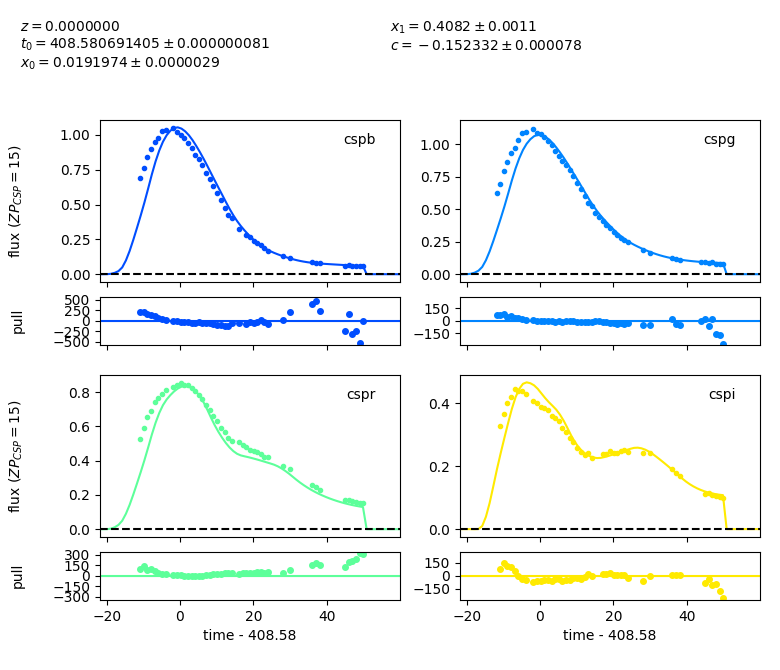

In [5]:
%matplotlib notebook
sncosmo.plot_lc(teste, model=fitted_model2, errors=result2.errors, zp = 15, zpsys = 'csp')
plt.show()

In [ ]:
import os.path

In [2]:
name_of_file = "salt2rband"

completeName = os.path.join("/home/joao/Documentos/comparacao", name_of_file+".dat")      

f = open(completeName, 'w')
for i in range(0,len(chi_quad_ndof)):
    
    f.write(str(chi_quad_ndof[i])+"\n")
    
f.close()

NameError: name 'os' is not defined

In [ ]:
print(np.mean(chi_quad_ndof))
print(len(chi_quad_ndof))

In [ ]:
histograma = plt.hist(chi_quad_ndof, bins=20)
plt.title("Histograma chi_quadrado por grau de liberdade")
plt.show()

In [ ]:
from __future__ import print_function
import matplotlib.pyplot as plt
#import sncosmo
import jp as sncosmo
import astropy.units as u
import glob
import numpy as np

par= sncosmo.SALT2Source(modeldir=None, m0file='M0.dat', m1file='M1.dat', m2file='M2.dat', cdfile='salt2_color_dispersion.dat', errscalefile='salt2_lc_dispersion_scaling.dat', lcrv00file='salt2_lc_relative_variance_0.dat', lcrv11file='salt2_lc_relative_variance_1.dat', lcrv01file='salt2_lc_relative_covariance_01.dat', name=None, version=None)
#ab = sncosmo.get_magsystem('ab')
chi_quad_ndof = []
names = glob.glob("*.txt")

for j in range(0, len(names)):
    #j = 4
    print(names[j])

    data = sncosmo.read_lc(names[j])
    data['zp'] = 14.328
    #print(data['flux'])
    
    for i in range(0, len(data['flux'])):
        
        data['fluxerr'][i] = 2*np.log(10)*(10**((data['zp'][i] - data['flux'][i])/2.5))*data['fluxerr'][i]/2.5 #flux error conversion
        #data['fluxerr'][i] = (2*np.log(10)/5)*10**(2*(data['zp'][i] - data['flux'][i])/5)*data['fluxerr'][i]
        
        data['flux'][i] = csp.band_mag_to_flux(data['flux'][i], 'cspb')
    
    #print(data['flux'])
    model = sncosmo.Model(source=par)
    #model.bandmag('cspb', 'csp')
    #model.set(z=0.0151)  # set the model's redshift
    
    result, fitted_model = sncosmo.fit_lc( data, model, ['z', 't0', 'x0', 'x1', 'x2'], bounds={'z':(0, data['redshift'][0]+0.1)})
               
    index = []
    
    for i in range(0,len(data['time'])):
        
        if data['time'][i] - result.parameters[1] > 50:
            
            index.append(i)
                
        if data['time'][i] - result.parameters[1] < -20:
            
            index.append(i)
        
        
    teste = np.delete(data, index , axis=0)           
    
    model2 = sncosmo.Model(source=par)
    
    result2, fitted_model2 = sncosmo.fit_lc(teste, model2, ['z', 't0', 'x0', 'x1', 'x2'], bounds={'z':(teste['redshift'][0]-0.01, teste['redshift'][0]+0.01)})
    
    
    chi_quad_ndof.append(result2.chisq/result2.ndof)
                
#sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)
#plt.show()
print(chi_quad_ndof)
print(np.mean(chi_quad_ndof), np.std(chi_quad_ndof))
#sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)
#plt.show()

In [ ]:
sncosmo.plot_lc(teste, model=fitted_model2, errors=result2.errors, zp=14.328, zpsys='csp')
plt.show()

In [ ]:
np.mean(chi_quad_ndof)
len(chi_quad_ndof)

In [ ]:
histograma = plt.hist(chi_quad_ndof, bins=20)
plt.title("Histograma chi_quadrado por grauf de liberdade")
plt.show()